In [2]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer


In [3]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [4]:
columns=["Id","Company","Opinion","Tweet"]

In [5]:
twitter_data=pd.read_csv("twitter_training.csv",names=columns)

In [6]:
twitter_data.head()

,Id,Company,Opinion,Tweet
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [7]:
twitter_data=twitter_data.dropna()

In [8]:
twitter_data["Opinion"].value_counts()

Negative      22358
Positive      20655
Neutral       18108
Irrelevant    12875
Name: Opinion, dtype: int64

In [9]:
twitter_data.shape

(73996, 4)

In [10]:
twitter_data.drop_duplicates("Tweet",inplace=True)

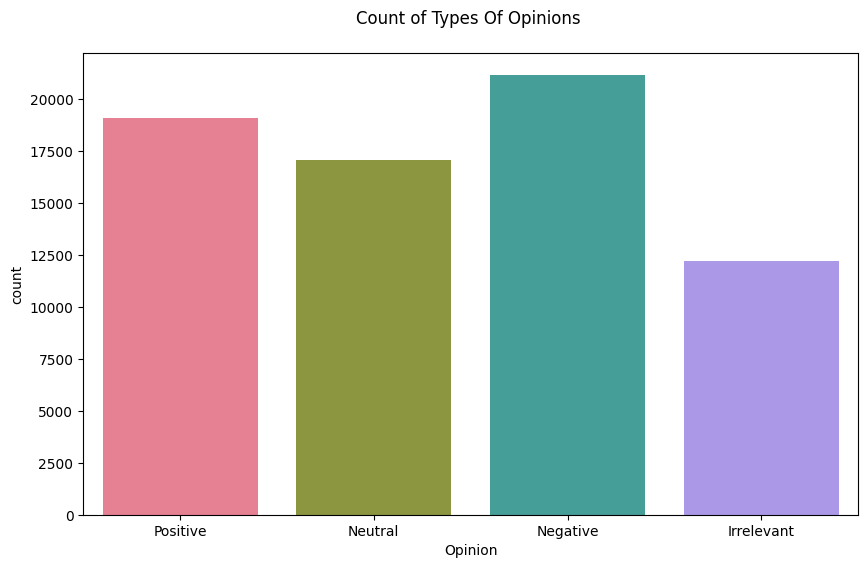

In [11]:
plt.figure(figsize=(10,6))
plt.title("Count of Types Of Opinions \n")
sns.countplot(data=twitter_data,x="Opinion",palette="husl");

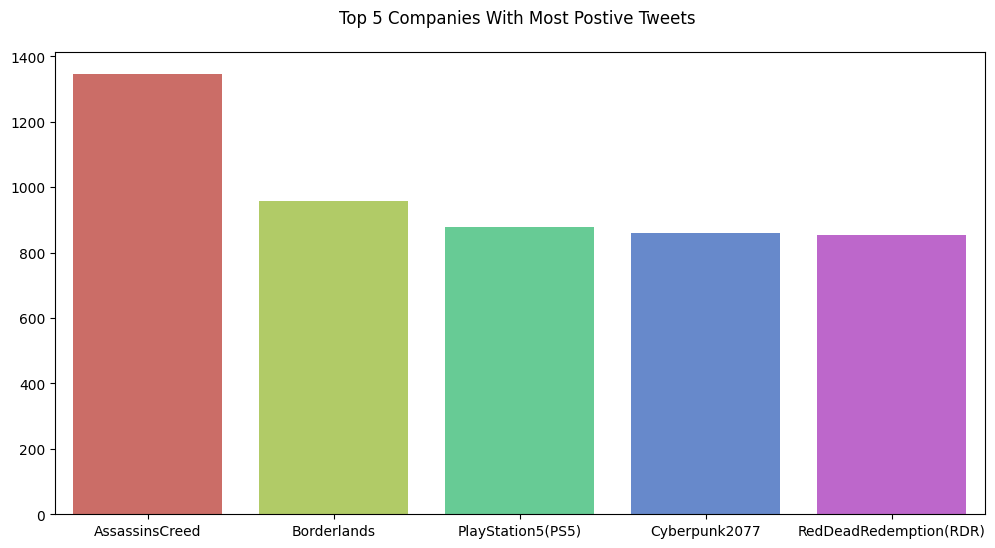

In [12]:
con=twitter_data["Opinion"]=="Positive"
top_five_positive=twitter_data.loc[con].Company.value_counts().nlargest(5)
plt.figure(figsize=(12,6))
plt.title("Top 5 Companies With Most Postive Tweets \n");
sns.barplot(x=top_five_positive.index,y=top_five_positive.values,palette="hls");

## Data Preprocessing For Sentiment Analysis

In [13]:
port_stem=PorterStemmer()

In [14]:
def stemming(content):
  stemmed_content=re.sub('[^a-zA-Z]',' ',content)
  stemmed_content=stemmed_content.lower()
  stemmed_content=stemmed_content.split()
  stemmed_content=[port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
  stemmed_content=' '.join(stemmed_content)

  return stemmed_content

In [15]:
twitter_data["Stemmed_Content"]=twitter_data["Tweet"].apply(stemming)

In [16]:
encoder = LabelEncoder()
twitter_data["Opinion"] = encoder.fit_transform(twitter_data["Opinion"])

In [17]:
twitter_data.head()

,Id,Company,Opinion,Tweet,Stemmed_Content
0,2401,Borderlands,3,im getting on borderlands and i will murder yo...,im get borderland murder
1,2401,Borderlands,3,I am coming to the borders and I will kill you...,come border kill
2,2401,Borderlands,3,im getting on borderlands and i will kill you ...,im get borderland kill
3,2401,Borderlands,3,im coming on borderlands and i will murder you...,im come borderland murder
4,2401,Borderlands,3,im getting on borderlands 2 and i will murder ...,im get borderland murder


### Dependant Variables and Independant Variables

In [18]:
X=twitter_data["Stemmed_Content"].values
Y=twitter_data['Opinion'].values

In [19]:
Y.shape

(69491,)

In [20]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y)

### Creating Sparse Matrix for Words


In [21]:
vectorizer=TfidfVectorizer()
X_train=vectorizer.fit_transform(X_train)
X_test=vectorizer.transform(X_test)

In [22]:
model=LogisticRegression(max_iter=1000)

In [23]:
model.fit(X_train,Y_train)

LogisticRegression(max_iter=1000)

### Predicting Sentiments and Accuracy Score  

In [24]:
X_test_pred=model.predict(X_test)
accuracy=accuracy_score(Y_test,X_test_pred)

In [25]:
print(np.concatenate( (Y_test.reshape(len(Y_test),1) , X_test_pred.reshape(len(X_test_pred),1) ) ,1   )  )

[[1 1]
 [1 3]
 [0 1]
 ...
 [2 2]
 [1 1]
 [0 2]]


In [26]:
print("Accuracy rate of the model is "+ str(accuracy*100)+" %")

Accuracy rate of the model is 77.78976904813297 %
